In [15]:
import numpy as np
import librosa 
import matplotlib.pyplot as plt
import pickle
from PyEMD import EMD
import numpy as np
import os
import pandas as pd
from sklearn.preprocessing import normalize
from scipy.signal import medfilt
from scipy.signal import savgol_filter
import datetime
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100


In [16]:
path_data = './my_data/'
path_store_figure = './figures/'

In [17]:
# df = pd.read_csv(path_data+'owid-covid-data.csv')  
url = 'https://covid19.who.int/WHO-COVID-19-global-data.csv'
df = pd.read_csv(url)

In [18]:
df.columns

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

In [19]:
dates = df['Date_reported'].unique()
dates = [datetime.datetime.strptime(ts, "%Y-%m-%d") for ts in dates]
dates.sort()
sorteddates = [datetime.datetime.strftime(ts, "%Y-%m-%d") for ts in dates]
data_1 = []
data_2 = []
for i in range(len(dates)):
    data_1.append(np.sum(df.loc[df['Date_reported']==sorteddates[i]]['Cumulative_deaths'].values))
    data_2.append(np.sum(df.loc[df['Date_reported']==sorteddates[i]]['Cumulative_cases'].values))
    

In [20]:
countries = df['Country'].unique()
all_country = np.zeros((len(countries),len(sorteddates)))
for i in range(len(countries)):
    temp = df[df['Country']==countries[i]]
    for j in range(len(sorteddates)):
        temp_1 = temp[temp['Date_reported']==sorteddates[j]]
        if len(temp_1):
            all_country[i,j] = temp_1['New_cases']

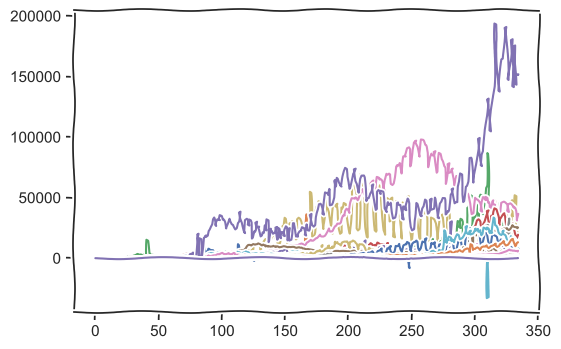

In [21]:
plt.plot(all_country.T)
plt.show()

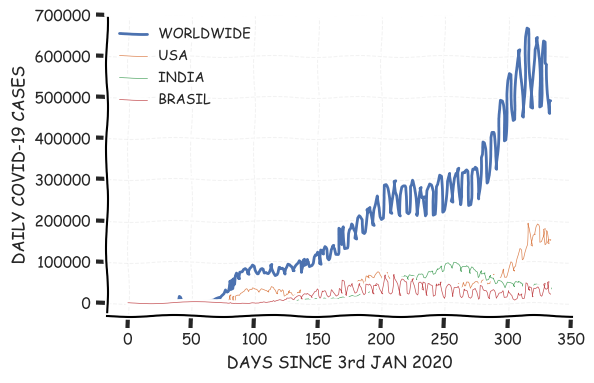

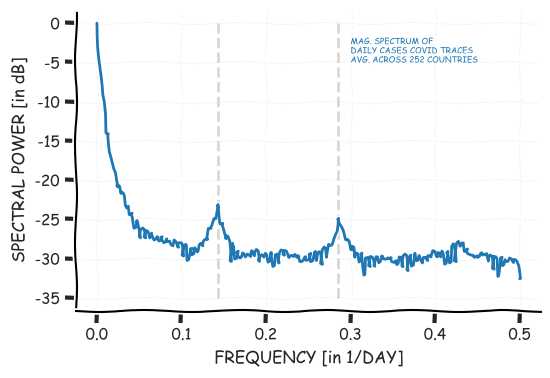

In [22]:
S = []
for i in range(all_country.shape[0]):
#     s = all_country[np.where(countries=='United States of America')[0][0],:]
    s = np.nan_to_num(all_country[i,:])+1e-10
    s[s<0] = 0
    s = s/np.max(np.abs(s))
    S.append(s)

# take fft
nfft = 512
S = np.array(S)
S_fft = np.abs(np.fft.rfft(S,nfft,axis=1))
# normalize
for i in range(S.shape[0]):
    S_fft[i,:] = S_fft[i,:]/(np.max(S_fft[i,:])+10e-10)
#mean and std 
S_fft = 20*np.log10(S_fft+10e-20)
S_mu = np.mean(S_fft,axis=0)
S_std = np.std(S_fft,axis=0)/np.sqrt(all_country.shape[0])



# plot time series
fig = plt.subplots(figsize=[6,4])
plt.xkcd()
ax = plt.subplot(1,1,1)

clr_1 = 'tab:blue'
ax.plot(np.sum(all_country,axis=0),label='WORLDWIDE')
ax.plot(all_country[np.where(countries=='United States of America')[0][0],:],label='USA',linewidth=.5)
ax.plot(all_country[np.where(countries=='India')[0][0],:],label='INDIA',linewidth=.5)
ax.plot(all_country[np.where(countries=='Brazil')[0][0],:],label='BRASIL',linewidth=.5)
ax.legend(loc='upper left',fontsize=10,frameon=False)
ax.grid(axis='both', color='gray', linestyle='--', linewidth=.75,alpha=.1)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlabel('DAYS SINCE 3rd JAN 2020')
ax.set_ylabel('DAILY COVID-19 CASES')
# ax.text(.3,-5,'MAG. SPECTRUM OF \nDAILY CASES COVID TRACES \nAVG. ACROSS 252 COUNTRIES',\
#        c=clr_1,fontsize=6)
fmt = 'png'
plt.savefig('/Users/neeks/Desktop/Documents/work/code/python_codes/notebookCodes/coswara/figures/'\
                  +'covid_trace_spectrum.'+fmt, dpi=300, format=fmt,transparent=False,bbox_inches='tight')
plt.show()


# plot spectrum
fig = plt.subplots(figsize=[6,4])
ax = plt.subplot(1,1,1)

fs = 1
faxis = np.arange(0,nfft/2+1)*fs/nfft
clr_1 = 'tab:blue'
ax.plot(faxis,S_mu,c=clr_1,linewidth=2)
# ax.plot(faxis,S_mu - S_std,color='r',alpha=.3,linewidth=.5)
# ax.plot(faxis,S_mu + S_std,color='r',alpha=.3,linewidth=.5)
ax.vlines(1/7, -35, 0, colors='gray', linestyles='--',alpha=.3)
ax.vlines(2/7, -35, 0, colors='gray', linestyles='--',alpha=.3)
ax.grid(axis='both', color='gray', linestyle='--', linewidth=.75,alpha=.1)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlabel('FREQUENCY [in 1/DAY]')
ax.set_ylabel('SPECTRAL POWER [in dB]')
ax.text(.3,-5,'MAG. SPECTRUM OF \nDAILY CASES COVID TRACES \nAVG. ACROSS 252 COUNTRIES',\
       c=clr_1,fontsize=6)
fmt = 'png'
plt.savefig('/Users/neeks/Desktop/Documents/work/code/python_codes/notebookCodes/coswara/figures/'\
                  +'covid_trace_time_domain.'+fmt, dpi=300, format=fmt,transparent=False,bbox_inches='tight')
plt.show()

# emd = EMD()
# IMFs = emd(s)

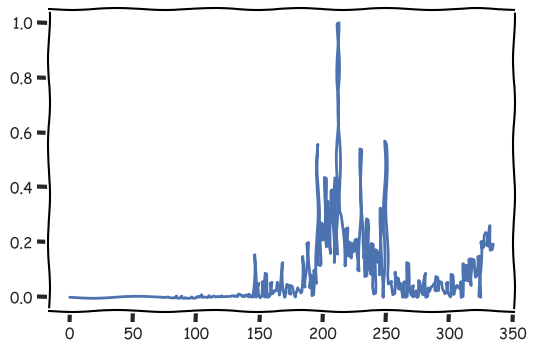

In [23]:
# s = np.nan_to_num(all_country[i,:])
# s = s - np.mean(s)
# s = s/np.max(np.abs(s))
# plt.plot(s)
plt.plot(s)
plt.show()

In [24]:
np.mean(s)

0.06170575692982901

/Users/neeks/miniconda2/envs/py36/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.canvas.print_figure(bytes_io, **kw)


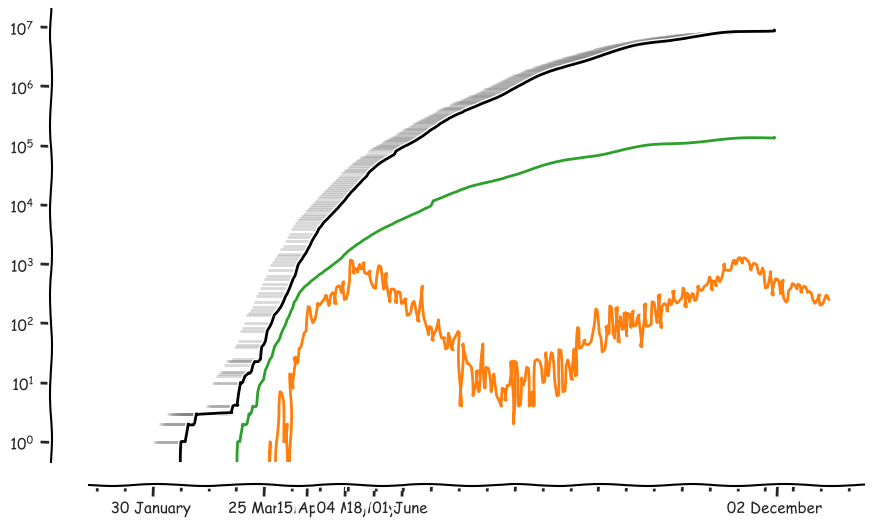

In [25]:
fig = plt.subplots(figsize=(10,6))
ax = plt.subplot(1,1,1)
ax.semilogy(all_country[100,:],color='tab:orange')
ax.plot(total_cases['totalrecovered'],color='black')
ax.plot([i for i in total_cases['totaldeceased']],color='tab:green')
for i in range(len(total_cases['totalrecovered'])):
    ax.hlines(total_cases['totalrecovered'][i],i-14,i,colors='grey', linestyles='solid',alpha=0.3)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=2)
ax.grid(True)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('axes', -0.05))
xticks = [0,55,76,95,109,123,len(total_cases['totalconfirmed'])]
ax.set_xticks(xticks)
ax.set_xticklabels([total_cases['date'][xticks[0]],total_cases['date'][xticks[1]],
                    total_cases['date'][xticks[2]],total_cases['date'][xticks[3]],
                    total_cases['date'][xticks[4]],total_cases['date'][xticks[5]],
                    total_cases['date'][-1]])
# axes.set_ylim([0,70])
plt.show()

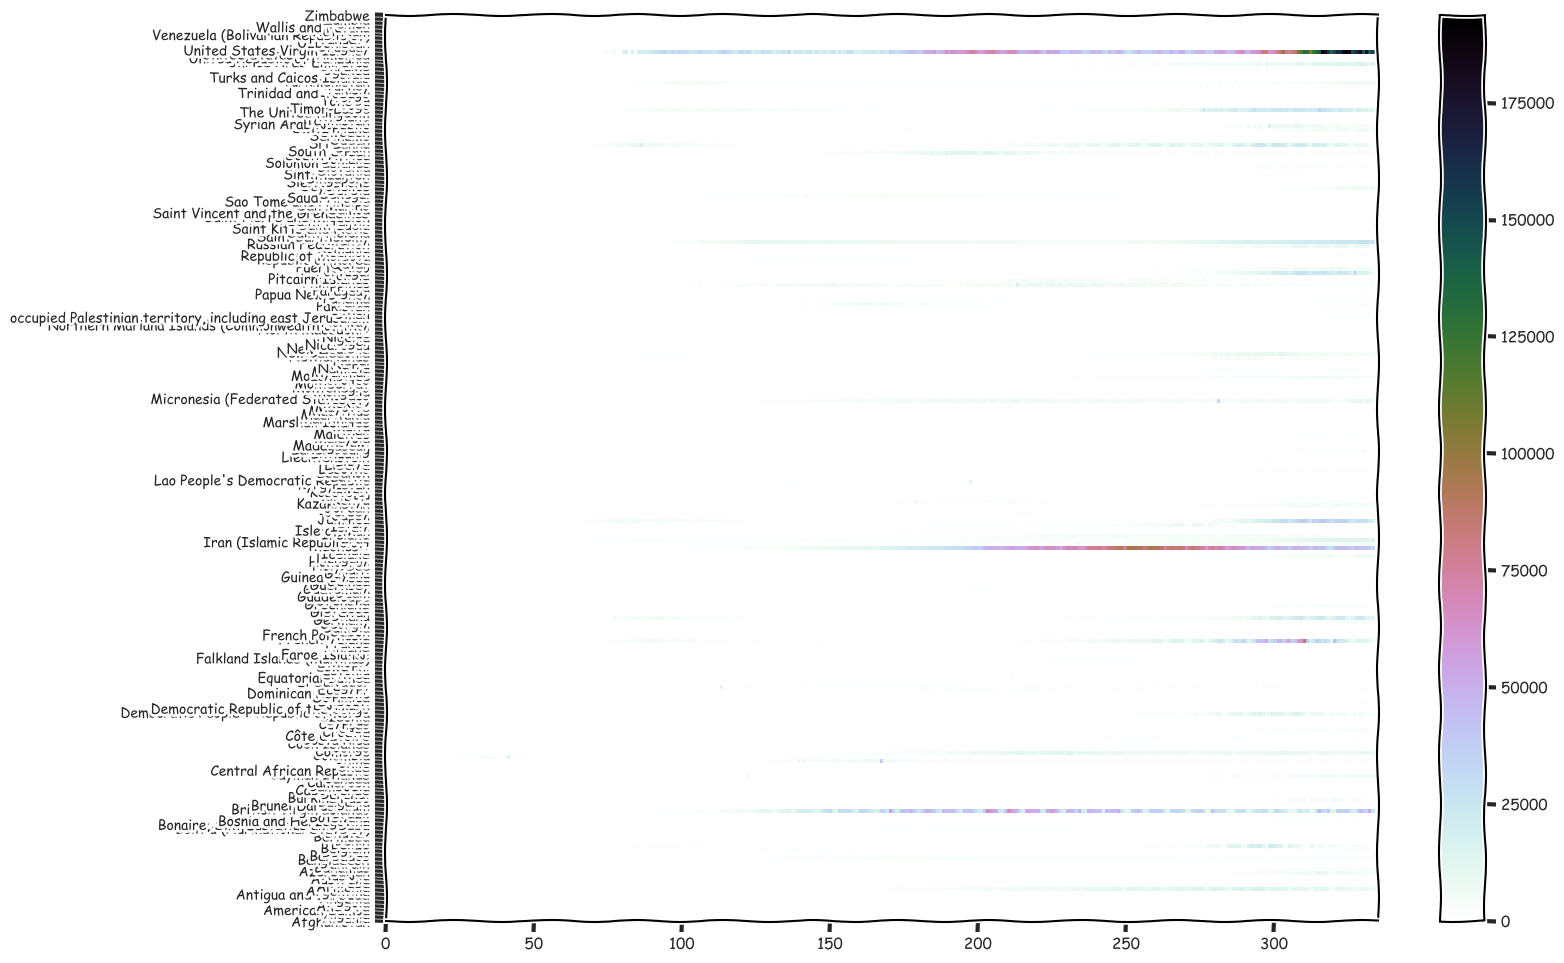

In [26]:
fig,ax = plt.subplots(1,1,figsize=(16,12))
X, Y = np.arange(0,all_country.shape[1]), np.arange(0,all_country.shape[0])
im = ax.pcolormesh(X,Y, all_country, vmin=0, vmax=np.max(all_country), cmap='cubehelix_r')
plt.xlim(0,all_country.shape[1])
plt.yticks(np.arange(0,all_country.shape[0]), countries,rotation=0,fontsize=10)
cbar = fig.colorbar(im, ax=ax)
# cbar.set_label('CUMULATIVE DEATHS',size=13)
# plt.ylabel("COUNTRY",fontsize=13)
# plt.xlabel("DAYS",fontsize=13)
# plt.title('COVID-19 Fatality Spread Across Globe',fontsize=13)
plt.show()



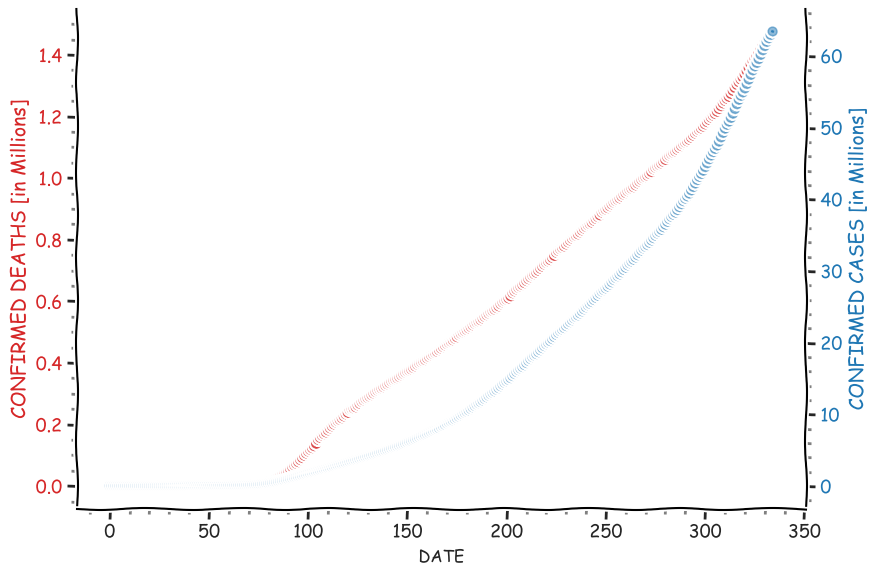

In [27]:
# Create some mock data
fig, ax1 = plt.subplots(figsize=(9,6))

color = 'tab:red'
ax1.set_xlabel('DATE')
ax1.set_ylabel('CONFIRMED DEATHS [in Millions]', color=color, fontsize=14)
ax1.plot(np.array(data_1)/1e6, '-o',color=color,alpha=0.7)
ax1.tick_params(axis='y', labelcolor=color)
ax1.spines['top'].set_visible(False)
ax1.grid(True)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='both', width=2)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4, color='gray')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
# plt.xticks([0,31,60,91,len(sorteddates)-1],\
#            ['11 Jan','11 Feb','11 Mar','11 Apr','16 May 2020'],rotation=0)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('CONFIRMED CASES [in Millions]', color=color,fontsize=14)  # we already handled the x-label with ax1
ax2.plot(np.array(data_2)/1e6,'-o', color=color,alpha=0.5)
ax2.tick_params(axis='y', labelcolor=color)
ax2.spines['top'].set_visible(False)
ax1.grid(True)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.tick_params(which='both', width=2)
ax2.tick_params(which='major', length=7)
ax2.tick_params(which='minor', length=4, color='gray')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
# plt.xticks([0,31,60,91,len(sorteddates)-1],\
#            ['11 Jan','11 Feb','11 Mar','11 Apr','16 May 2020'],rotation=0)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.savefig(path_store_figure+"IS2020_coswara_covid_who.pdf", bbox_inches='tight')
plt.show()


In [28]:
print(sorteddates[0])
print(sorteddates[31])
print(sorteddates[60])
print(sorteddates[91])
print(sorteddates[121])
print(sorteddates[-1])

xticks = [0,31,60,91,121,len(sorteddates)-1]









2020-01-03
2020-02-03
2020-03-03
2020-04-03
2020-05-03
2020-12-02


In [29]:
import json
import requests
import seaborn as sns

sns.set(style="ticks")

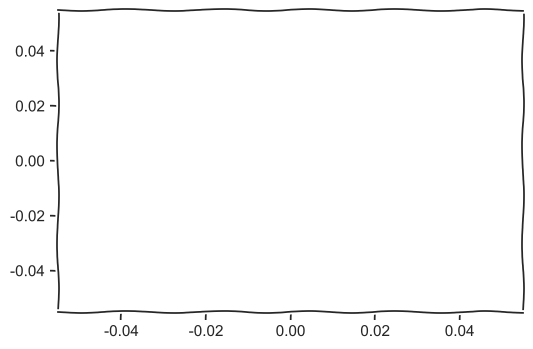

In [35]:
plt.plot(daily_testing['samplereportedtoday'])
# plt.xlim([100,190])

In [34]:
    
resp = requests.get('https://api.covid19india.org/data.json')
if resp.status_code != 200:
    # This means something went wrong.
    raise ApiError('GET /tasks/ {}'.format(resp.status_code))
    
    
daily_testing = {}
daily_testing['totalsamplestested'] = []
daily_testing['samplereportedtoday'] = []
daily_testing['date'] = []

for item in resp.json()['tested']:
    if item['totalsamplestested']!='':
        daily_testing['totalsamplestested'].append(int(item['totalsamplestested']))
    else:
        daily_testing['totalsamplestested'].append(0)
    daily_testing['date'].append(item['updatetimestamp'])

daily_cases = {}
daily_cases['dailyconfirmed'] = []
daily_cases['dailydeceased'] = []
daily_cases['dailyrecovered'] = []
daily_cases['date'] = []

for item in resp.json()['cases_time_series']:
    daily_cases['dailyconfirmed'].append(int(item['dailyconfirmed']))
    daily_cases['dailydeceased'].append(int(item['dailydeceased']))
    daily_cases['dailyrecovered'].append(int(item['dailyrecovered']))
    daily_cases['date'].append(item['date'])
    
total_cases = {}
total_cases['totalconfirmed'] = []
total_cases['totaldeceased'] = []
total_cases['totalrecovered'] = []
total_cases['date'] = []

for item in resp.json()['cases_time_series']:
    total_cases['totalconfirmed'].append(int(item['totalconfirmed']))
    total_cases['totaldeceased'].append(int(item['totaldeceased']))
    total_cases['totalrecovered'].append(int(item['totalrecovered']))
    total_cases['date'].append(item['date'])
    
#     print('{} {} {} {}'.format(item['dailyconfirmed'], item['dailydeceased'],item['dailyrecovered'],item['date']))


    

In [57]:
mpl.rcParams.update(mpl.rcParamsDefault)

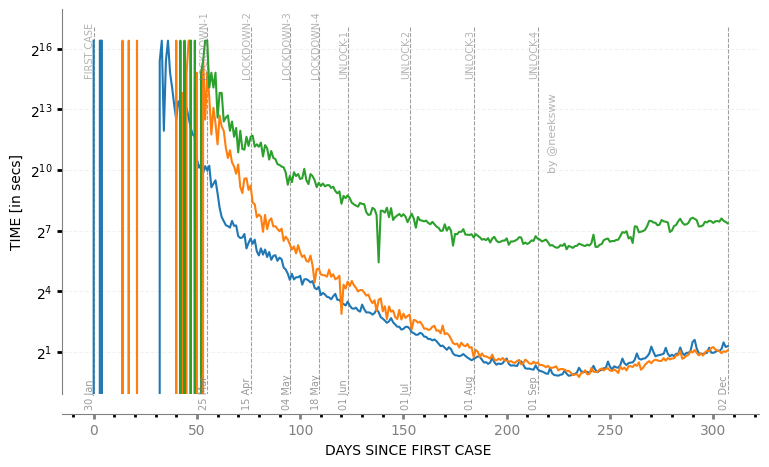

In [61]:
fig = plt.subplots(figsize=(9,5))
clr_1 = "tab:blue"
clr_2 = "tab:orange"
clr_3 = "tab:green"

ax = plt.subplot(1,1,1)
ax.semilogy([24*60*60/i if i>0 else 0 for i in daily_cases['dailyconfirmed']],color=clr_1,label='SOMEONE BECOMES A PATIENT',
           basey=2)
ax.plot([24*60*60/i if i>0 else 0 for i in daily_cases['dailyrecovered']],color=clr_2,label='SOMEONE RECOVERS')
ax.plot([24*60*60/i if i>0 else 0 for i in daily_cases['dailydeceased']],color=clr_3,label='SOMEONE DIES')
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=2)
ax.grid(axis='y', color='gray', linestyle='--', linewidth=.75,alpha=.1)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -.05))
ax.yaxis.set_ticks_position('left')

xticks = [0,55,76,95,109,123,153,184,215,len(total_cases['totalconfirmed'])-1]
cnt = 0
str_lock = ['FIRST CASE','LOCKDOWN-1','LOCKDOWN-2','LOCKDOWN-3','LOCKDOWN-4','UNLOCK-1','UNLOCK-2','UNLOCK-3'\
            ,'UNLOCK-4',' ']
xlabels = []
ind_1 = 6

for i in xticks:
    ax.vlines(i,min(total_cases['totaldeceased']),max(total_cases['totaldeceased']),
              linestyles ="--", colors ="gray",alpha=0.5,linewidth=.75)
    ax.vlines(i,min(total_cases['totaldeceased']),max(total_cases['totaldeceased']),
              linestyles ="--", colors ="gray",alpha=0.5,linewidth=.75)
    ax.text(x=i-4,y=25000,s=str_lock[cnt],rotation=90,fontsize=7,color='gray',alpha=0.6)
    if  i == len(total_cases['totalconfirmed']):
        xlabels.append(total_cases['date'][-1][:ind_1])
    else:
        xlabels.append(total_cases['date'][xticks[cnt]][:ind_1])
    ax.text(i-4,.3,xlabels[cnt],rotation=90,fontsize=7,color='gray',alpha=0.8)
    cnt = cnt+1
ax.set_ylabel('TIME [in secs]',fontsize=10)
ax.set_xlabel('DAYS SINCE FIRST CASE ',fontsize=10)
ax.text(220,1024,'by @neeksww',fontsize=8,rotation=90,color='gray',alpha=0.6)
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('gray')
ax.spines["left"].set_color('gray')
ax.tick_params(axis='x', colors='gray')
# fmt = 'png'
# plt.savefig('/Users/neeks/Desktop/Documents/work/code/python_codes/notebookCodes/coswara/figures/'\
#                   +'covid_status_time_whole_india.'+fmt, dpi=300, format=fmt,transparent=False,bbox_inches='tight')
plt.show()





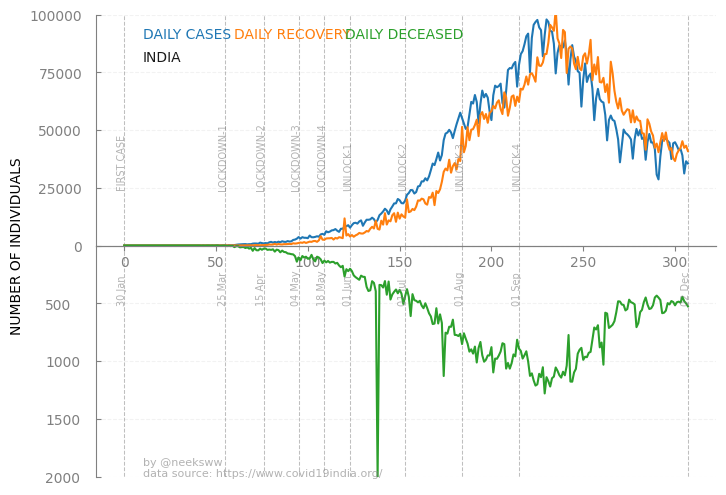

In [62]:
fig = plt.subplots(figsize=(8,6))
clr_1 = "tab:blue"
clr_2 = "tab:orange"
clr_3 = "tab:green"

ax1 = plt.subplot(1,1,1)
ax1.plot(np.arange(0,len(daily_cases['dailyconfirmed']),1),daily_cases['dailyconfirmed'],\
         color=clr_1,label='DAILY CASES')
ax1.plot(np.arange(0,len(daily_cases['dailyrecovered']),1),daily_cases['dailyrecovered'],\
         color=clr_2,label='DAILY RECOVERED')
ax1.grid(axis='y', color='gray', linestyle='--', linewidth=.75,alpha=.1)
# # for i in range(len(daily_cases['dailyrecovered'])):
# #     ax.hlines(daily_cases['dailyrecovered'][i],i-14,i,colors='grey', linestyles='solid',alpha=0.3)
# ax1.xaxis.set_minor_locator(AutoMinorLocator())
# ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.spines['top'].set_color('none')
ax1.spines['bottom'].set_position('center')
ax1.spines["left"].set_bounds(0, 100000)
ax1.spines["left"].set_color('gray')
ax1.spines["right"].set_bounds(0, 0)
ax1.spines['bottom'].set_color('gray')
ax1.tick_params(axis='y', colors='gray')
ax1.tick_params(axis='x', colors='gray')

ax1.set_yticks(np.arange(0, 100001,25000)) 
ax1.set_ylim([-100000,100000])
ax1.text(10,80000,'INDIA',fontsize=10,color='k')
ax1.text(10,90000,'DAILY CASES',fontsize=10,color=clr_1)
ax1.text(60,90000,'DAILY RECOVERY',fontsize=10,color=clr_2)
ax1.text(120,90000,'DAILY DECEASED',fontsize=10,color=clr_3)
ax1.tick_params(axis='y', colors='gray',direction='out')



ax2 = ax1.twinx()  
color = 'tab:red'
ax2.plot(np.arange(0,len(daily_cases['dailyconfirmed'])),[i for i in daily_cases['dailydeceased']],
         color=clr_3,label='DAILY DECEASED')
ax2.grid(axis='y',color='gray', linestyle='--', linewidth=.75,alpha=.1)
# ax2.xaxis.set_minor_locator(AutoMinorLocator())
# ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.spines['top'].set_color('none')
ax2.spines['bottom'].set_position('center')
ax2.spines["left"].set_bounds(0, 2000)
ax2.spines["left"].set_bounds(0, 0)
ax2.spines["right"].set_bounds(0, 2000)
ax2.spines["right"].set_position(('axes',0))
ax2.spines['bottom'].set_color('gray')
ax2.spines["right"].set_color('gray')
ax2.tick_params(axis='x', colors='gray')

ax2.set_yticks(np.arange(0,2100,500)[1:]) 
ax2.set_ylim([-2000,2000])
plt.gca().invert_yaxis()
ax1.tick_params(axis='y', colors='gray',direction='in', pad=10)
ax2.tick_params(axis='y', colors='gray',direction='out', pad=-40)


xticks = [0,55,76,95,109,123,153,184,215,len(total_cases['totalconfirmed'])-1]
cnt = 0
str_lock = ['FIRST CASE','LOCKDOWN-1','LOCKDOWN-2','LOCKDOWN-3','LOCKDOWN-4','UNLOCK-1','UNLOCK-2','UNLOCK-3'\
            ,'UNLOCK-4',' ']
xlabels = []
ind_1 = 6
for i in xticks:
    ax1.vlines(i,min(total_cases['totaldeceased']),max(total_cases['totaldeceased']),
              linestyles ="--", colors ="gray",alpha=0.5,linewidth=.75)
    ax2.vlines(i,min(total_cases['totaldeceased']),max(total_cases['totaldeceased']),
              linestyles ="--", colors ="gray",alpha=0.5,linewidth=.75)
    ax1.text(i-4,25000,str_lock[cnt],rotation=90,fontsize=7,color='gray',alpha=0.6)
    if  i == len(total_cases['totalconfirmed']):
        xlabels.append(total_cases['date'][-1][:ind_1])
    else:
        xlabels.append(total_cases['date'][xticks[cnt]][:ind_1])
    ax2.text(i-4,500,xlabels[cnt],rotation=90,fontsize=7,color='gray',alpha=0.6)
    cnt = cnt+1
ax1.set_ylabel('NUMBER OF INDIVIDUALS',fontsize=10)
ax2.text(10,1900,'by @neeksww',fontsize=8,color='gray',alpha=0.6)
ax2.text(10,2000,'data source: https://www.covid19india.org/',fontsize=8,color='gray',alpha=0.6)

fmt = 'png'
plt.savefig('/Users/neeks/Desktop/Documents/work/code/python_codes/notebookCodes/coswara/figures/'\
                  +'covid_status_whole_india.'+fmt, dpi=300, format=fmt,transparent=False,bbox_inches='tight')
plt.show()

In [17]:
total_cases['date'][215]

'01 September '

In [63]:
dataset = {}

dataset['month'] = []
dataset['day'] = []
dataset['year'] = []

dataset['dailyconfirmed'] = daily_cases['dailyconfirmed']
dataset['dailyrecovered'] = daily_cases['dailyrecovered']
dataset['dailydeceased'] = daily_cases['dailydeceased']

In [64]:
# date creation
for date in total_cases['date']:
    day = int(date.split(' ' )[0])
    month = date.split(' ')[1]
    if month == 'January':
        month_val = 1
    if month == 'February':
        month_val = 2
    if month == 'March':
        month_val = 3
    if month == 'April':
        month_val = 4
    if month == 'May':
        month_val = 5
    if month == 'June':
        month_val = 6
    if month == 'July':
        month_val = 7
    if month == 'August':
        month_val = 8
    if month == 'September':
        month_val = 9
    if month == 'October':
        month_val = 10
    if month == 'November':
        month_val = 11
    if month == 'December':
        month_val = 12
    year_val = 2020
    day_val = datetime.datetime(year_val, month_val, day).strftime("%A")
    # push into dict
    dataset['day'].append(day_val)
    dataset['month'].append(month_val)
    dataset['year'].append(year_val)

In [65]:
df = pd.DataFrame.from_dict(dataset)

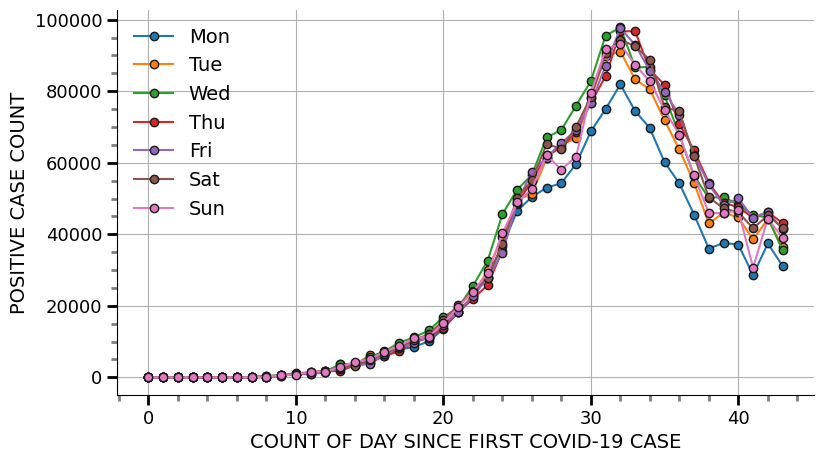

In [66]:
label_day = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

fig = plt.subplots(figsize=[9,5])
ax = plt.subplot(1,1,1)
day_mu = []
for i in label_day:
#     if i == 'Monday' or i == 'Saturday':
        temp = df[df['day']==i]['dailyconfirmed'].values
        ax.plot(temp,'-',label=i[:3],marker='o',markeredgecolor='k')
        day_mu.append(np.mean(df[df['day']==i]['dailyconfirmed']))
        ax.grid(True)
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
ax1.grid(color='gray', linestyle='--', linewidth=1,alpha=.1)
ax.set_xlabel('COUNT OF DAY SINCE FIRST COVID-19 CASE',fontsize=14)
ax.set_ylabel('POSITIVE CASE COUNT',fontsize=14)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4, color='gray')
ax.legend(frameon=False,fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

# ax = plt.subplot(1,3,2)
# for i in label_day:
#     ax.plot(df[df['day']==i]['dailyrecovered'])
#     ax.grid(True)
#     ax.spines['right'].set_color('none')
#     ax.spines['top'].set_color('none')

# ax = plt.subplot(1,3,3)
# for i in label_day:
#     ax.plot(df[df['day']==i]['dailydeceased'])
#     ax.grid(True)
#     ax.spines['right'].set_color('none')
#     ax.spines['top'].set_color('none')


2666.6666666666665


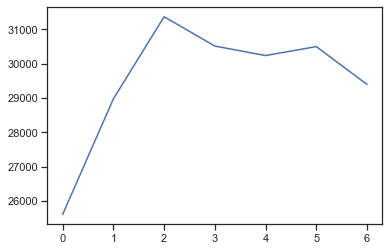

In [9]:
a = df[df['day']==i]['dailyconfirmed']
print(80000/30)
plt.plot(day_mu)

/Users/neeks/miniconda2/envs/py36/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.canvas.print_figure(bytes_io, **kw)


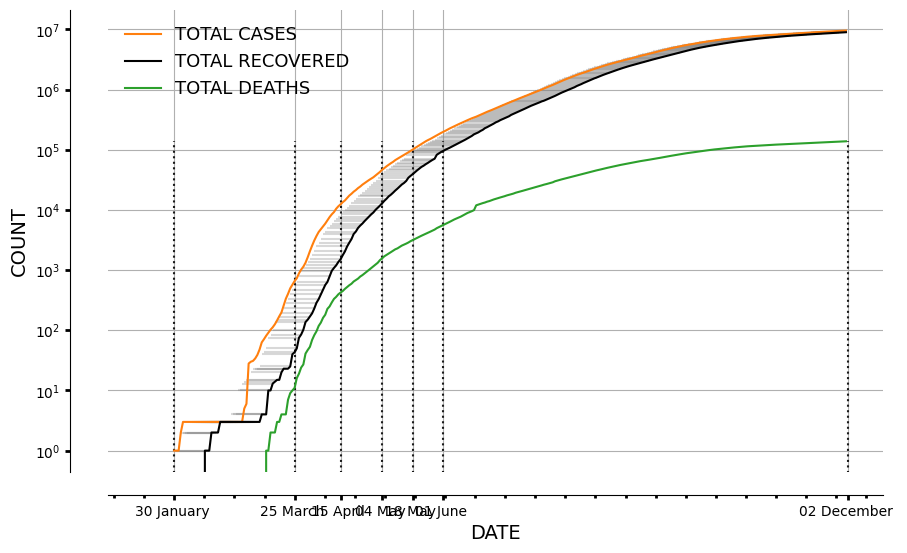

In [67]:
fig = plt.subplots(figsize=(10,6))
ax = plt.subplot(1,1,1)
ax.semilogy(total_cases['totalconfirmed'],color='tab:orange',label='TOTAL CASES')
# ax.plot(total_cases['totalconfirmed'],color='tab:orange',label='TOTAL CASES')
ax.plot(total_cases['totalrecovered'],color='black',label='TOTAL RECOVERED')
ax.plot([i for i in total_cases['totaldeceased']],color='tab:green',label='TOTAL DEATHS')
for i in range(len(total_cases['totalrecovered'])):
    ax.hlines(total_cases['totalrecovered'][i],i-14,i,colors='grey', linestyles='solid',alpha=0.3)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=2)
ax.grid(True)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))  ,       
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('axes', -0.05))
xticks = [0,55,76,95,109,123,len(total_cases['totalconfirmed'])]
for i in xticks:
    ax.vlines(i,min(total_cases['totaldeceased']),max(total_cases['totaldeceased']),linestyles ="dotted", colors ="k")
ax.set_xticks(xticks)
ax.set_xticklabels([total_cases['date'][xticks[0]],total_cases['date'][xticks[1]],
                    total_cases['date'][xticks[2]],total_cases['date'][xticks[3]],
                    total_cases['date'][xticks[4]],total_cases['date'][xticks[5]],
                    total_cases['date'][-1]])
ax.set_xlabel('DATE',fontsize=14)
ax.set_ylabel('COUNT',fontsize=14)
ax.legend(loc='upper left',frameon=False,fontsize=13)
plt.show()


In [11]:
if resp.json()['tested'][-1]['totalindividualstested']!=None:
    print(resp.json()['tested'][-1]['totalindividualstested'])
    
if resp.json()['tested'][-1]['samplereportedtoday']!=None:
    print(resp.json()['tested'][-1]['totalsamplestested'])


107728088


In [12]:
resp.json()['cases_time_series']

[{'dailyconfirmed': '1',
  'dailydeceased': '0',
  'dailyrecovered': '0',
  'date': '30 January ',
  'dateymd': '2020-01-30',
  'totalconfirmed': '1',
  'totaldeceased': '0',
  'totalrecovered': '0'},
 {'dailyconfirmed': '0',
  'dailydeceased': '0',
  'dailyrecovered': '0',
  'date': '31 January ',
  'dateymd': '2020-01-31',
  'totalconfirmed': '1',
  'totaldeceased': '0',
  'totalrecovered': '0'},
 {'dailyconfirmed': '0',
  'dailydeceased': '0',
  'dailyrecovered': '0',
  'date': '01 February ',
  'dateymd': '2020-02-01',
  'totalconfirmed': '1',
  'totaldeceased': '0',
  'totalrecovered': '0'},
 {'dailyconfirmed': '1',
  'dailydeceased': '0',
  'dailyrecovered': '0',
  'date': '02 February ',
  'dateymd': '2020-02-02',
  'totalconfirmed': '2',
  'totaldeceased': '0',
  'totalrecovered': '0'},
 {'dailyconfirmed': '1',
  'dailydeceased': '0',
  'dailyrecovered': '0',
  'date': '03 February ',
  'dateymd': '2020-02-03',
  'totalconfirmed': '3',
  'totaldeceased': '0',
  'totalrecovered'

In [13]:
resp = requests.get('https://api.covid19api.com/countries')
if resp.status_code != 200:
    # This means something went wrong.
    raise ApiError('GET /tasks/ {}'.format(resp.status_code))

    

In [14]:
resp.json()

[{'Country': 'Hong Kong, SAR China',
  'Slug': 'hong-kong-sar-china',
  'ISO2': 'HK'},
 {'Country': 'Jersey', 'Slug': 'jersey', 'ISO2': 'JE'},
 {'Country': 'Taiwan, Republic of China', 'Slug': 'taiwan', 'ISO2': 'TW'},
 {'Country': 'Christmas Island', 'Slug': 'christmas-island', 'ISO2': 'CX'},
 {'Country': 'Cuba', 'Slug': 'cuba', 'ISO2': 'CU'},
 {'Country': 'Holy See (Vatican City State)',
  'Slug': 'holy-see-vatican-city-state',
  'ISO2': 'VA'},
 {'Country': 'Syrian Arab Republic (Syria)', 'Slug': 'syria', 'ISO2': 'SY'},
 {'Country': 'Montenegro', 'Slug': 'montenegro', 'ISO2': 'ME'},
 {'Country': 'Montserrat', 'Slug': 'montserrat', 'ISO2': 'MS'},
 {'Country': 'Oman', 'Slug': 'oman', 'ISO2': 'OM'},
 {'Country': 'Tunisia', 'Slug': 'tunisia', 'ISO2': 'TN'},
 {'Country': 'French Southern Territories',
  'Slug': 'french-southern-territories',
  'ISO2': 'TF'},
 {'Country': 'Monaco', 'Slug': 'monaco', 'ISO2': 'MC'},
 {'Country': 'Saint-Barthélemy', 'Slug': 'saint-barthélemy', 'ISO2': 'BL'},
 

In [15]:
df = pd.read_csv('./my_data/covid/tested_numbers_icmr_data.csv')

In [16]:
dates = df["Tested As Of"].values

In [17]:
daily_RTPCR_tets = df["Daily RTPCR tests"].values

In [18]:
temp = df["Total Samples Tested"].values
temp = df["Total Positive Cases"].values

In [19]:
df = pd.read_csv('./my_data/covid/state_wise_daily.csv')
df = pd.read_csv('https://api.covid19india.org/csv/latest/state_wise_daily.csv')

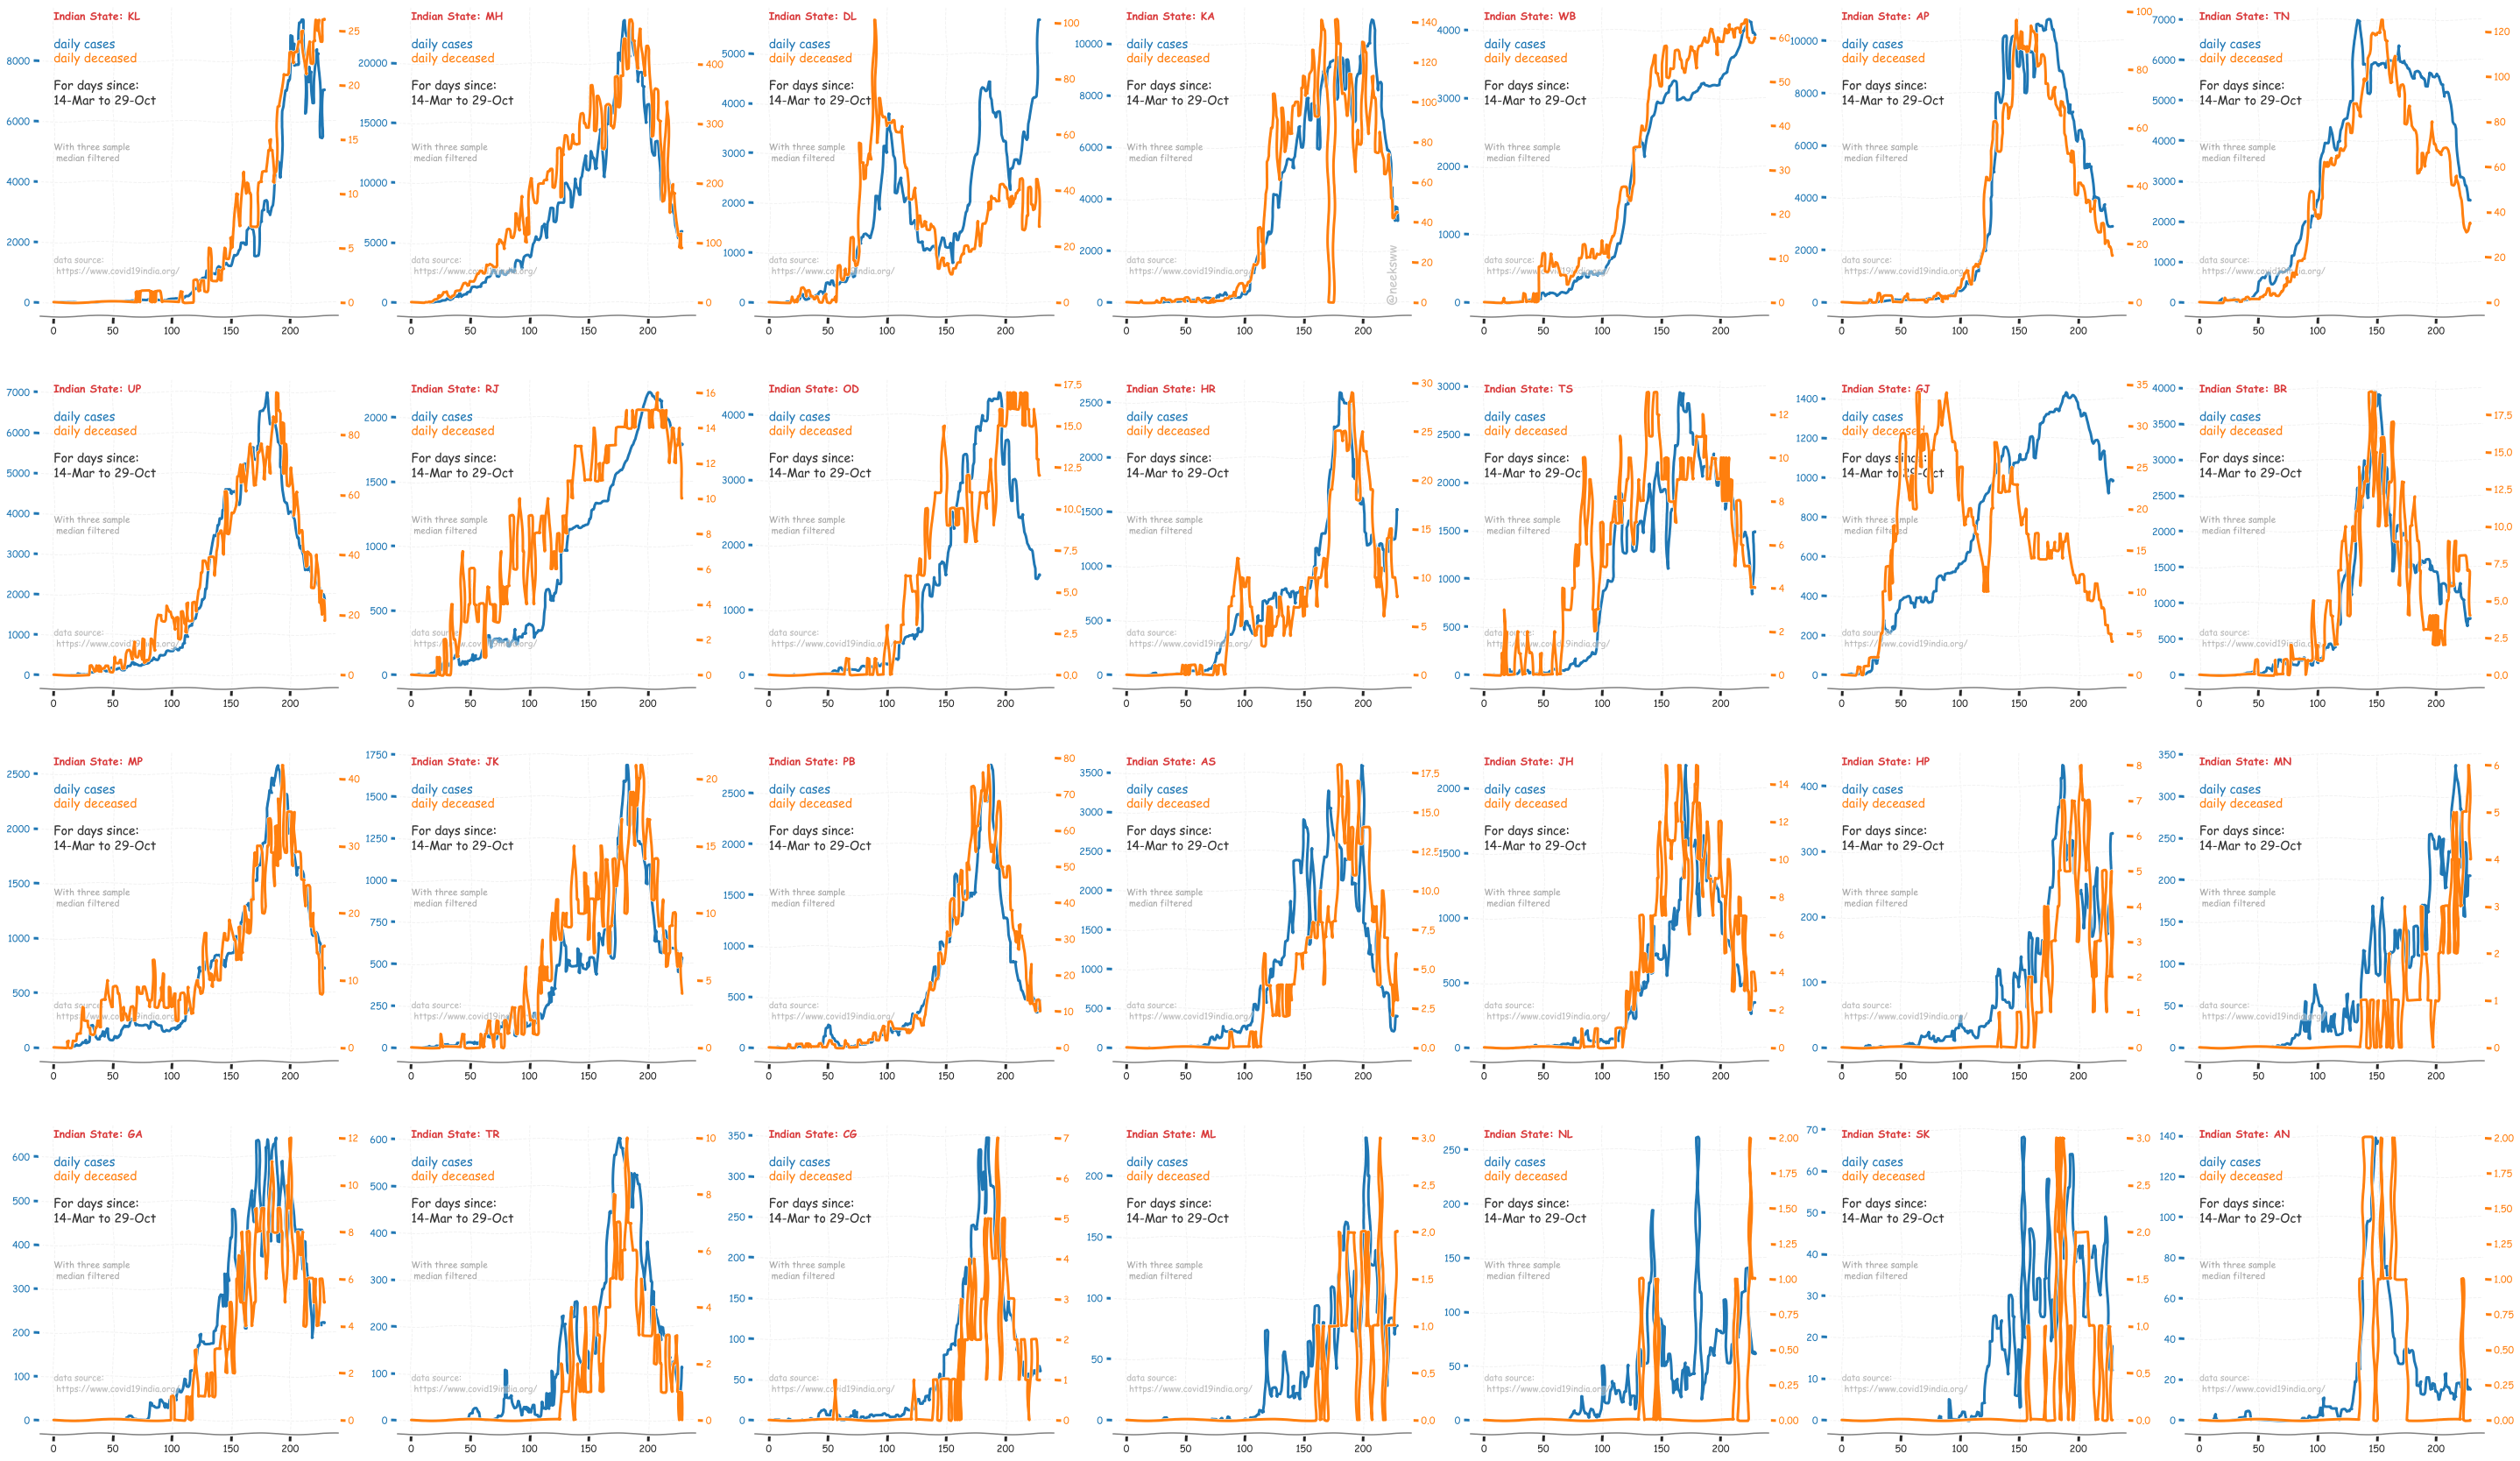

In [20]:
# temp_1 = normalize(temp_1,norm='max', axis=0)
state_labels = ['KA','TN','MH','DL','GJ','KL']
state_labels = ['MH','KA','AP','UP','TN','RJ','TG','AS','CH','KL','DL','BR',\
                'GJ','OR','WB','HR','JK','HP','MP','PB','NL','GA','JH','AN',\
                'MN','ML','SK','TR',
               ]
state_labels_= ['MH','KA','AP','UP','TN','RJ','TS','AS','CG','KL','DL','BR',\
                'GJ','OD','WB','HR','JK','HP','MP','PB','NL','GA','JH','AN',\
                'MN','ML','SK','TR'
               ]



clr_1 = 'tab:blue'
clr_2 = 'tab:orange'

cnt = 0
start_cases = []
start_decea = []
current_cases = []

for i in state_labels:
    cnt+= 1
    start_cases.append(np.where(np.cumsum(df[df['Status']=='Confirmed'][i].values)>5)[0][0])
    start_decea.append(np.where(np.cumsum(df[df['Status']=='Deceased'][i].values)>5)[0][0])
    current_cases.append(df[df['Status']=='Confirmed'][i].values[-1])

indx = np.argsort(current_cases)[::-1]   

fig = plt.subplots(figsize=[50,30])
cnt = 0
all_states_cases = []
all_states_decea = []

plt.xkcd()
for i in indx:
    cnt+= 1
    ax1 = plt.subplot(4,7,cnt)
    ax2 = ax1.twinx()  
    
    temp_1 = medfilt(df[df['Status']=='Confirmed'][state_labels[i]].values,3)
    all_states_cases.append(temp_1/max(temp_1))
#     temp_1 = savgol_filter(df[df['Status']=='Confirmed'][state_labels[i]].values,window_length=7, polyorder=1,\
#                            deriv=0, delta=1.0, axis=0, mode='nearest')
    
    temp_2 = medfilt(df[df['Status']=='Deceased'][state_labels[i]].values,3)
    all_states_decea.append(temp_2/(max(temp_2)))
#     temp_2 = savgol_filter(df[df['Status']=='Deceased'][state_labels[i]].values,window_length=7, polyorder=1,\
#                            deriv=0, delta=1.0, axis=0, mode='nearest')

    ax1.plot(np.arange(0,len(temp_1),1),temp_1,color=clr_1, linewidth=3)
    ax1.spines['right'].set_color('none')
    ax1.spines['left'].set_color('none')
    ax1.spines['top'].set_color('none')
    ax1.spines['bottom'].set_color('gray')
    ax1.tick_params(axis='y', colors=clr_1)
    ax2.tick_params(axis='x', colors='gray')
    ax1.text(0,max(temp_1)-0.0*max(temp_1),'Indian State: '+state_labels_[i],fontsize=12,color='tab:red',alpha=0.9,
            fontweight='bold')
#     ,\bbox=dict(facecolor='gray', alpha=0.2))
    ax1.text(0,max(temp_1)-0.1*max(temp_1),'daily cases',fontsize=14,color=clr_1)
    ax1.text(0,max(temp_1)-0.15*max(temp_1),'daily deceased',fontsize=14,color=clr_2)
    ax1.text(0,max(temp_1)-0.3*max(temp_1),'For days since:\n'+ df['Date'][0].split('-20')[0] +' to '+\
             df['Date'][len(df)-1].split('-20')[0],fontsize=14,color='black',alpha=0.75)
    ax1.text(0,max(temp_1)-0.5*max(temp_1),'With three sample\n median filtered',fontsize=10,color='gray',
                 rotation=0,alpha=0.6)
    ax1.text(0,max(temp_1)-0.9*max(temp_1),'data source:\n https://www.covid19india.org/',fontsize=10,color='gray',
                 rotation=0,alpha=0.4)
    if cnt == 4:
        ax1.text(len(temp_1)-10,0,'@neeksww',fontsize=14,color='gray',
                 rotation=90,alpha=0.3)
    ax1.grid(color='gray', linestyle='--', linewidth=1,alpha=.1)
    
    ax2.plot(np.arange(0,len(temp_2),1),temp_2,color=clr_2, linewidth=3)
    ax2.tick_params(axis='x', labelcolor=clr_2)    
    ax2.spines['top'].set_color('none')
    ax2.spines['right'].set_color('none')
    ax2.spines['left'].set_color('none')
    ax2.spines['bottom'].set_color('gray')
    ax2.tick_params(axis='y', colors=clr_2)

#     clr_face = (79/256,178/256,151/256)
#     ax1.set_facecolor(clr_face)
#     ax2.set_facecolor(clr_face)


fmt = 'png'
plt.savefig('/Users/neeks/Desktop/Documents/work/code/python_codes/notebookCodes/coswara/figures/'\
                  +'covid_status_india.'+fmt, dpi=300, format=fmt,transparent=False,bbox_inches='tight')
plt.show()

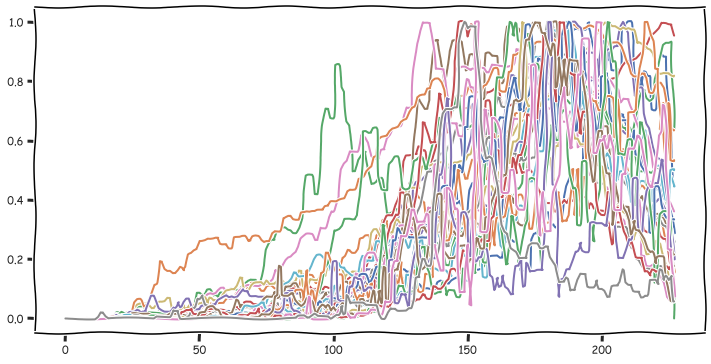

In [41]:
fig, ax = plt.subplots(figsize=[12,6])
for i in range(len(all_states_cases)):
    plt.plot(all_states_cases[i])
plt.show()

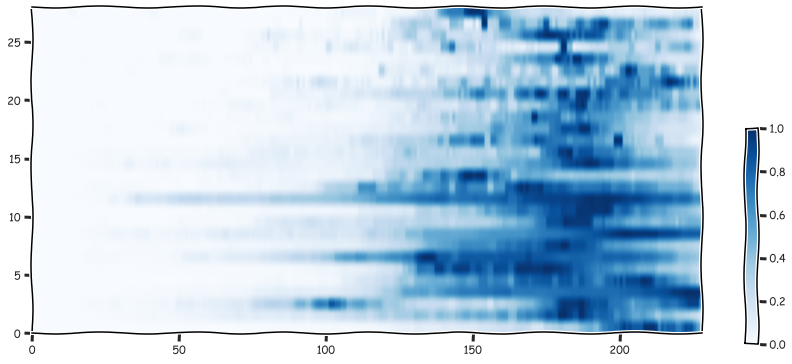

In [37]:
fig, ax = plt.subplots(figsize=[12,6])
im = ax.imshow(all_states_cases,origin='lower',aspect='auto',extent =\
               [0,temp_1.shape[0], 0, len(all_states_cases)],
               cmap='Blues',vmin = 0, vmax =1)
divider = make_axes_locatable(ax)
colorbar_ax = fig.add_axes([.95, 0.1, 0.015, 0.5])
fig.colorbar(im, cax=colorbar_ax)
plt.show()

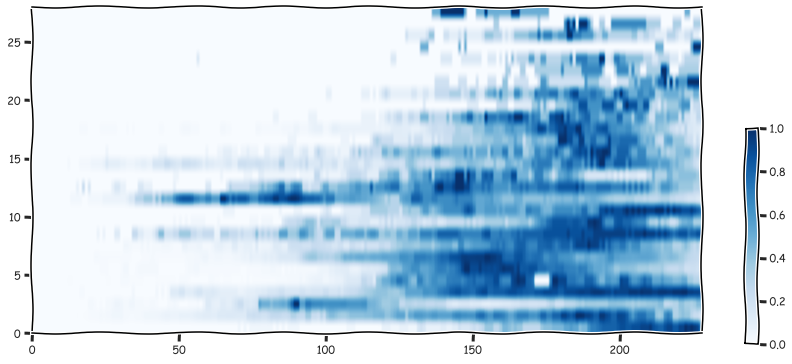

In [38]:
fig, ax = plt.subplots(figsize=[12,6])
im = ax.imshow(all_states_decea,origin='lower',aspect='auto',extent =\
               [0,temp_1.shape[0], 0, len(all_states_cases)],
               cmap='Blues',vmin = 0, vmax =1)
divider = make_axes_locatable(ax)
colorbar_ax = fig.add_axes([.95, 0.1, 0.015, 0.5])
fig.colorbar(im, cax=colorbar_ax)
plt.show()

In [34]:
df

Date    Date_YMD     Status     TT  AN    AP   AR    AS    BR  CH  \
0    14-Mar-20  2020-03-14  Confirmed     81   0     1    0     0     0   0   
1    14-Mar-20  2020-03-14  Recovered      9   0     0    0     0     0   0   
2    14-Mar-20  2020-03-14   Deceased      2   0     0    0     0     0   0   
3    15-Mar-20  2020-03-15  Confirmed     27   0     0    0     0     0   0   
4    15-Mar-20  2020-03-15  Recovered      4   0     0    0     0     0   0   
..         ...         ...        ...    ...  ..   ...  ...   ...   ...  ..   
679  26-Oct-20  2020-10-26  Recovered  63734  14  3972  231  2832  1087  63   
680  26-Oct-20  2020-10-26   Deceased    485   0    19    2     2     9   4   
681  27-Oct-20  2020-10-27  Confirmed  43034  21  2901   81   403   678  67   
682  27-Oct-20  2020-10-27  Recovered  58428  22  4352  115  2443  1237  49   
683  27-Oct-20  2020-10-27   Deceased    517   0    19    1     6     7   1   

     ...   PB    RJ  SK    TN    TG   TR    UP   UT    WB  UN  
0    ...    1     3   0     1     1    0    12    0     0   0  
1    ...    0     1   0     0     0    0     4    0     0   0  
2    ...    0     0   0     0     0    0     0    0     0   0  
3    ...    0     1   0     0     2    0     1    0     0   0  
4    ...    0     2   0     0     1    0     0    0     0   0  
..   ...  ...   ...  ..   ...   ...  ...   ...  ...   ...  ..  
679  ...  326  2226   5  4014  1432  183  2441  700  3889   0  
680  ...    8    14   1    32     4    0    20    8    59   0  
681  ...  346  1796  23  2522   837   36  1986  213  3957   0  
682  ...  463  2066   4  4029  1554   84  2335  422  3917   0  
683  ...   13    14   2    27     4    1    38    6    58   0  

[684 rows x 42 columns]

In [35]:
print(indx[::-1])
print(indx)

[23 26 27 20  8 25 24 21 17 22 19  7 16 18 11  6 12 13 15  5  3  4  2  1
 14 10  0  9]
[ 9  0 10 14  1  2  4  3  5 15 13 12  6 11 18 16  7 19 22 17 21 24 25  8
 20 27 26 23]


NameError: name 'XdB' is not defined

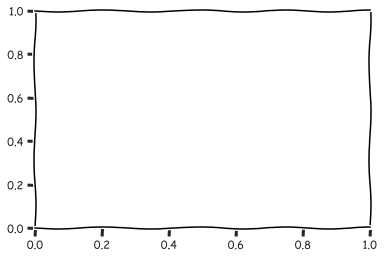

In [36]:
fig, ax = plt.subplots(figsize=(6,4))
im = ax.imshow(XdB,origin='lower',aspect='auto',extent = [times[0], times[-1], 0, fs/2/1e3],
               cmap='RdBu_r',vmin = 0, vmax =-100)
divider = make_axes_locatable(ax)
colorbar_ax = fig.add_axes([.95, 0.1, 0.015, 0.5])
fig.colorbar(im, cax=colorbar_ax)
ax.set_xlim(times[0],times[-1])
# ax.set_xlim(.2,3)
ax.set_ylim(-.1,4)
ax.set_xlabel('TIME [in s]')
ax.set_ylabel('FREQ [in kHz]')
sns.despine(offset = 0.01,trim=False)
plt.show()

In [ ]:
# fatalities per-day

data = [710000/365, 420000/365, 180000/365, 140000/365, 7665/7]
label = ['Infants', 'TB', 'Traffic\n Accident', 'Suicide', 'COVID-19']

fig = plt.subplots(figsize=[9,5])

# Example data
ax = plt.subplot(1,1,1)
ax.barh(np.arange(0,len(label)), data, hatch="\\\\",color='None',edgecolor='tab:red',height=.35)
ax.barh(np.arange(0,len(label)), data, color='None',edgecolor='gray',height=.35)
ax.set_yticks(y_pos)
ax.set_yticklabels(label)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('NUMBER OF CASUALTIES PER DAY')
ax.set_title('COMPARING VARIOUS CAUSES OF PER-DAY CASUALTIES IN INDIA')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.text(1150,4.25,'*Computed only over\n week ending 27/09',color='gray')
ax.grid(color='gray', linestyle='--', linewidth=2,alpha=.1)
fmt = 'png'
plt.savefig('/Users/neeks/Desktop/Documents/work/code/python_codes/notebookCodes/coswara/figures/'\
                  +'covid_status_india_casuality_per_day.'+fmt, dpi=300, format=fmt,transparent=False,bbox_inches='tight')
plt.show()


In [ ]:
# read biadWatch data
biasWatch_india_faculty.csv